In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data/WeekendsUAIS.csv")

In [3]:
data[data[data.columns[0]] == 52]

,Общий викенд,Викенд в месяце,Месяц,Даты,Дней в викенде,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
251,52,4,Октябрь,с 25 окт. 2018 по 28 окт. 2018,3,Среднее количество зрителей,27,22,51,19,...,12,6,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,52,4,Октябрь,с 25 окт. 2018 по 28 окт. 2018,3,Фильм,Смолфут,Несокрушимый,Веном,Репродукция,...,На границе миров,Кукловод,Экстаз,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,52,4,Октябрь,с 25 окт. 2018 по 28 окт. 2018,3,Сборы,"170,280,895","94,041,536","73,235,990","66,794,486",...,"2,934,566","2,667,450","2,247,114",NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,52,4,Октябрь,с 25 окт. 2018 по 28 окт. 2018,3,Зрители,"744,276","373,247","261,425","221,507",...,"9,250","10,622","7,191",NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,52,4,Октябрь,с 25 окт. 2018 по 28 окт. 2018,3,Сеансы,"29,318","16,600","9,411","10,366",...,943,844,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,52,4,Октябрь,с 25 окт. 2018 по 28 окт. 2018,3,Сборы за сеанс,"5,808","5,665","7,781","6,443",...,"3,111","3,160","7,802",NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,52,4,Октябрь,с 25 окт. 2018 по 28 окт. 2018,3,Среднее количество зрителей,25,22,27,21,...,9,12,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,52,4,Декабрь,с 19 дек. 2019 по 22 дек. 2019,3,Фильм,Звёздные Войны: Скайуокер. Восход,Полицейский с Рублевки. Новогодний Беспредел 2,Джуманджи: Новый уровень,Холодное сердце II,...,МУЛЬТ в кино. Выпуск № 109,Война Токов,Солярис.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,52,4,Декабрь,с 19 дек. 2019 по 22 дек. 2019,3,Сборы,"331,364,403","170,134,099","125,876,278","60,293,699",...,"1,365,933","795,160","730,903",NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,52,4,Декабрь,с 19 дек. 2019 по 22 дек. 2019,3,Зрители,"1,004,650","633,274","481,114","265,272",...,"10,974","2,531","2,257",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data[312:][data.columns[0]] += 61

/Users/nikitakrutoy/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
g = data.groupby(data.columns[0])

In [6]:
g.get_group(weekend_id + 1)

NameError: name 'weekend_id' is not defined

In [7]:
def prepare_value(a):
    if pd.isnull(a):
        return np.nan
    else:
        return int(a.replace(",", ""))

In [8]:
weekends = {}
for weekend_id in g.groups.keys():
    if weekend_id not in [95, 96, 51, 52]:
        sub_df = g.get_group(weekend_id)[data.columns[5:26]].transpose().reset_index(drop=True)
        headers = ["title_uais", "revenue", "viewers", "sessions", "revenue_per_session", "viewers_per_session"]
        new_df  = pd.DataFrame(sub_df.values[1:], columns=headers).set_index("title_uais")
        weekends[weekend_id] = new_df.applymap(prepare_value)
        weekends[weekend_id] = weekends[weekend_id].fillna(weekends[weekend_id].mean())

In [40]:
movies = pd.read_csv("data/MoviesKinopoiskPreprocessed.csv", index_col="title_uais")

In [44]:
movies = pd.read_csv("data/MoviesKinopoiskPreprocessedWithTrends.csv", index_col="title_uais")

In [41]:
movies

,runtime,budget,num_actors,num_directors,num_screenwriters,num_producers,num_operators,num_composers,num_art_direction_by,num_editing_by,...,type_documentary,type_other,type_popular-science,type_art,age_0,age_12,age_14,age_16,age_18,age_6
title_uais,,,,,,,,,,,,,,,,,,,,,
1+1: Голливудская история,126.0,3.750000e+07,10,1,3,3,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
100 вещей и ничего лишнего,111.0,1.409340e+07,10,1,1,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0
2001 год: Космическая одиссея,149.0,5.671537e+07,10,1,2,2,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
21 мост,99.0,2.853976e+07,10,1,2,3,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
22 мили,94.0,5.000000e+07,10,1,2,3,1,1,3,2,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Я иду искать,95.0,2.871423e+07,10,2,2,3,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
Я не такой. Я не такая,100.0,2.914991e+07,10,1,2,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Я сражаюсь с великанами,106.0,1.510000e+07,10,1,2,3,1,1,3,1,...,0,0,0,1,0,1,0,0,0,0


In [42]:
STOP_LIST = set([1, 49, 53, 97])
ALL_TITLES = set(movies.index)

def sample(n, stop_list):
    weekend_id = np.random.choice(np.array(list(weekends.keys() - stop_list)), 1).item()
    weekend = weekends[weekend_id]
    previous_weekend = weekends[weekend_id - 1]
    try:
    
        titles = np.random.choice(np.array(list(set(weekend.index) & ALL_TITLES)), n + 1, replace=False)
        title, current_context_titles = titles[0], titles[1:]
        previous_context_titles = np.random.choice(np.array(list(set(previous_weekend.index) & ALL_TITLES)), n, replace=False)

        if title in previous_weekend.index:
            prev_title_targets = previous_weekend.loc[title].values
        else:
            prev_title_targets = np.zeros(5)
        prev_title_targets

        targets = weekend.loc[title].values

        prev_context_targets = previous_weekend.loc[previous_context_titles].values.ravel()

        features = np.concatenate([
            movies.loc[current_context_titles].values.ravel(),
            movies.loc[previous_context_titles].values.ravel(),
            prev_title_targets,
            prev_context_targets
        ])
    except Exception:
        print(weekend_id)
    
    return features, targets

In [43]:
from tqdm.auto import tqdm

In [44]:
stop_list = set(list(weekends.keys())[-30:]).union(STOP_LIST)
X_train, y_train = [], []
for i in tqdm(range(50000)):
    features, targets  = sample(n=6, stop_list=stop_list)
    X_train.append(features)
    y_train.append(targets)
    
X_train = np.vstack(X_train)
y_train = np.vstack(y_train)

In [45]:
stop_list = set(list(weekends.keys())[:-30]).union(STOP_LIST)
X_test, y_test = [], []
for i in tqdm(range(10000)):
    features, targets  = sample(n=6, stop_list=stop_list)
    X_test.append(features)
    y_test.append(targets)
    
X_test = np.vstack(X_test)
y_test = np.vstack(y_test)

In [46]:
pd.isnull(y_train[:, 0]).any()

False

In [47]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer

In [75]:
model = LGBMRegressor()
model.fit(X_train, y_train[:, 0])
print(r2_score(y_test[:, 0], model.predict(X_test)))

-0.00017518292327367568


In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/nikitakrutoy/.pyenv/versions/3.6.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([9.35595655e-09, 5.00580100e-10, 1.65472424e-10, 1.42576868e-10,
        1.33210505e-10, 4.37096969e-11, 4.26689898e-11, 0.00000000e+00,
        1.45698990e-11, 8.32565655e-12]),
 array([2.71219000e+05, 9.63597371e+07, 1.92448255e+08, 2.88536773e+08,
        3.84625291e+08, 4.80713810e+08, 5.76802328e+08, 6.72890846e+08,
        7.68979364e+08, 8.65067882e+08, 9.61156400e+08]),
 <a list of 10 Patch objects>)

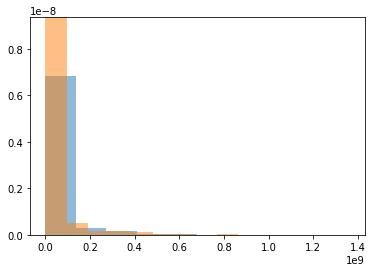

In [80]:
plt.hist(y_train[:, 0], normed=True, alpha=0.5)
plt.hist(y_test[:, 0], normed=True, alpha=0.5)

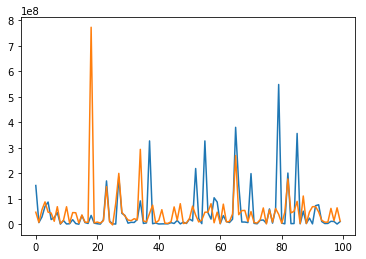

In [71]:
plt.plot(y_test[:100, 0])
plt.plot(model.predict(X_test[:100]))

In [50]:
# movies = pd.read_csv("data/MoviesKinopoiskPreprocessed.csv", index_col="title_uais")
model = LGBMRegressor()
model.fit(X_train, np.log(y_train[:, 0]))
print(r2_score(np.log(y_test[:1000, 0]), model.predict(X_test[:1000])))

0.5016344557611385


In [34]:
# movies = pd.read_csv("data/MoviesKinopoiskPreprocessedWithTrends.csv", index_col="title_uais")
model = LGBMRegressor()
model.fit(X_train, np.log(y_train[:, 0]))
print(r2_score(np.log(y_test[:1000, 0]), model.predict(X_test[:1000])))

0.4807119671098161


In [32]:
model = LGBMRegressor()
model.fit(X_train, np.log(y_train[:, 0]))
print(r2_score(np.log(y_test[:1000, 0]), model.predict(X_test[:1000])))

0.4823364681438961


In [52]:
np.random.seed(seed=42)

In [53]:
# movies = pd.read_csv("data/MoviesKinopoiskPreprocessedWithTrends.csv", index_col="title_uais")
results = cross_validate(
    LGBMRegressor(n_estimators=100, num_leaves=31), 
    X, y[:, 0], 
    cv=KFold(n_splits=5, shuffle=True), 
    scoring=make_scorer(r2_score),
    return_estimator=True
)
print("New results", np.mean(results["test_score"]))

New results 0.28478847403185764


In [43]:
# movies = pd.read_csv("data/MoviesKinopoiskPreprocessed.csv", index_col="title_uais")
results = cross_validate(
    LGBMRegressor(n_estimators=100, num_leaves=31), 
    X, y[:, 0], 
    cv=KFold(n_splits=5, shuffle=True), 
    scoring=make_scorer(r2_score),
    return_estimator=True
)
np.mean(results["test_score"])
print("Old results", np.mean(results["test_score"]))

Old results 0.29845878760355343


In [ ]:
results["test_score"]

In [242]:
best_model = results["estimator"][np.argmax(results["test_score"])]

In [243]:
x = np.random.choice(np.arange(y.shape[0]), size=100, replace=False)

In [244]:
y_pred = best_model.predict(X[x])

In [235]:
import matplotlib.pyplot as plt
%matplotlib inline

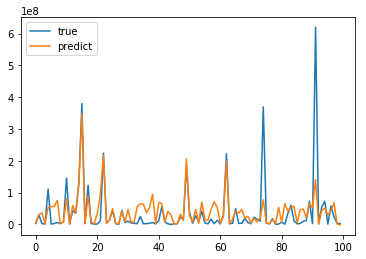

In [236]:
plt.plot(y[x, 0], label="true"),
plt.plot(y_pred, label="predict", alpha=1)
plt.legend()
# plt.savefig("pics/plot.png")
plt.show()

In [257]:
sum(abs(y_true - y_pred) > 1e6)

8807

(array([9.557e+03, 2.260e+02, 8.700e+01, 5.100e+01, 2.200e+01, 2.600e+01,
        1.200e+01, 5.000e+00, 6.000e+00, 8.000e+00]),
 array([2.82621012e+02, 9.13105765e+07, 1.82620870e+08, 2.73931164e+08,
        3.65241458e+08, 4.56551752e+08, 5.47862046e+08, 6.39172340e+08,
        7.30482633e+08, 8.21792927e+08, 9.13103221e+08]),
 <a list of 10 Patch objects>)

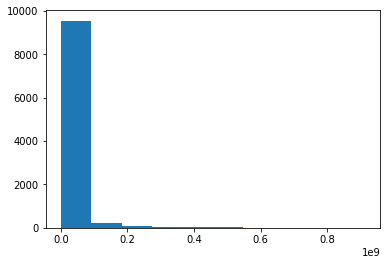

In [247]:
y_pred = best_model.predict(X[:10000])
y_true = y[:10000, 0]
plt.hist(abs(y_true - y_pred))

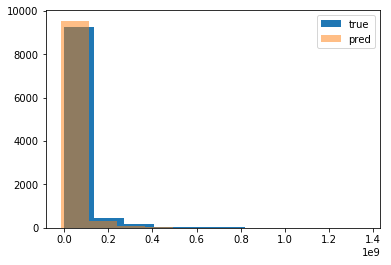

In [239]:
y_pred = best_model.predict(X[:10000])
y_true = y[:10000, 0]
plt.hist(y_true, label="true")
plt.hist(y_pred, label="pred", alpha=0.5)
plt.legend()
